In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
#plt.style.use('ggplot')
from sklearn import metrics

In [3]:
# Importing dataset
data = pd.read_csv('dummy.csv')
data.shape

(3000, 2)

In [4]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [5]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values

In [6]:
f1

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

In [7]:
f2

array([ -3.241693,  15.78481 ,   7.319176, ..., -10.50136 , -12.25584 ,
       -24.87731 ])

In [9]:
X = np.array(list(zip(f1,f2)))

In [10]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

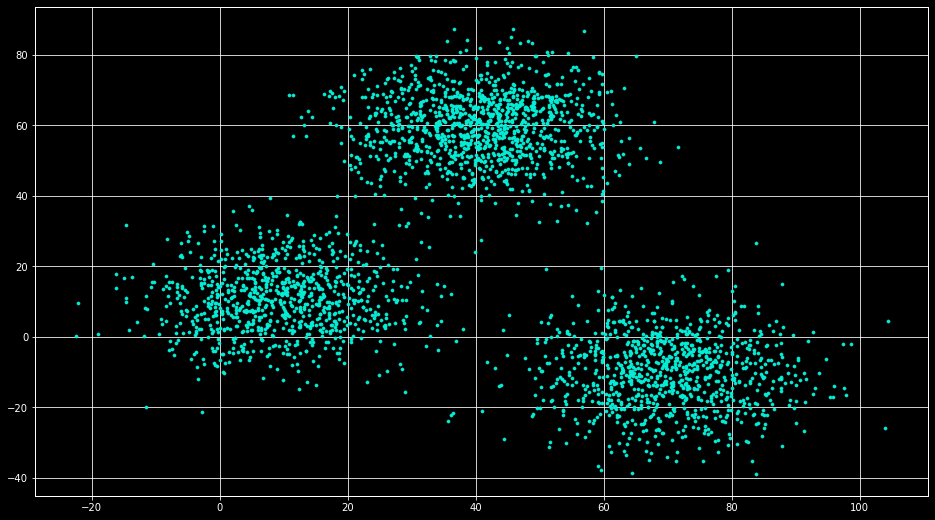

In [37]:
with plt.style.context('dark_background'):
    plt.scatter(f1,f2,c='#05ECD5',s=10)

In [27]:
from sklearn.cluster import KMeans
# Checking optimal number of clusters
cluster_range = range(1,15)      # Expect 4 to 4 clusters from the pair panel
cluster_errors = []
for i in cluster_range:
    clusters = KMeans( i,n_init = 5)
    clusters.fit(X)
    labels = clusters.labels_                 # Capture the cluster labels
    centroids = clusters.cluster_centers_     # Capture the centroids
    cluster_errors.append(clusters.inertia_)   # Capture the inertia

# Combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,5.030433e+06
1,2,2.309985e+06
2,3,6.116059e+05
3,4,5.355227e+05
4,5,4.702070e+05
5,6,4.079211e+05
6,7,3.590508e+05
7,8,3.130780e+05
8,9,2.718488e+05
9,10,2.525200e+05


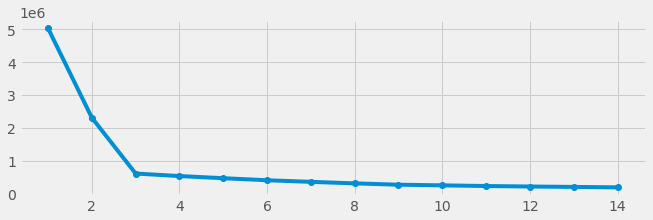

In [38]:
# Elbow Point
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10,3))
    plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker ="o")

In [43]:
# Number of clusters
kmeans = KMeans(n_clusters=5)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values:")
print("sklearn:")
print(centroids) # From sci-kit learn

Centroid values:
sklearn:
[[ 64.14597442  -4.25583804]
 [ 47.77389055  57.13612138]
 [  9.41556717  10.70888231]
 [ 32.51787584  62.68697773]
 [ 75.86116482 -16.24064579]]


In [47]:
colnames = ['col1','col2']
pred = kmeans.predict(X)
X_df = pd.DataFrame(X,columns = colnames)
X_df['group'] = pred

In [50]:
X_df.tail(20)

,col1,col2,group
2980,74.68241,-22.742850,4
2981,88.04622,2.738940,4
2982,41.72015,-7.237918,0
2983,61.91275,-12.987290,0
2984,74.79148,-17.637640,4
2985,61.99087,-15.765600,0
2986,82.01159,-18.703770,4
2987,78.71038,-15.101860,4
2988,85.51906,-22.094270,4
2989,76.53640,-11.392540,4


In [51]:
X_df['group'].value_counts()

2    897
1    612
3    537
0    489
4    465
Name: group, dtype: int64

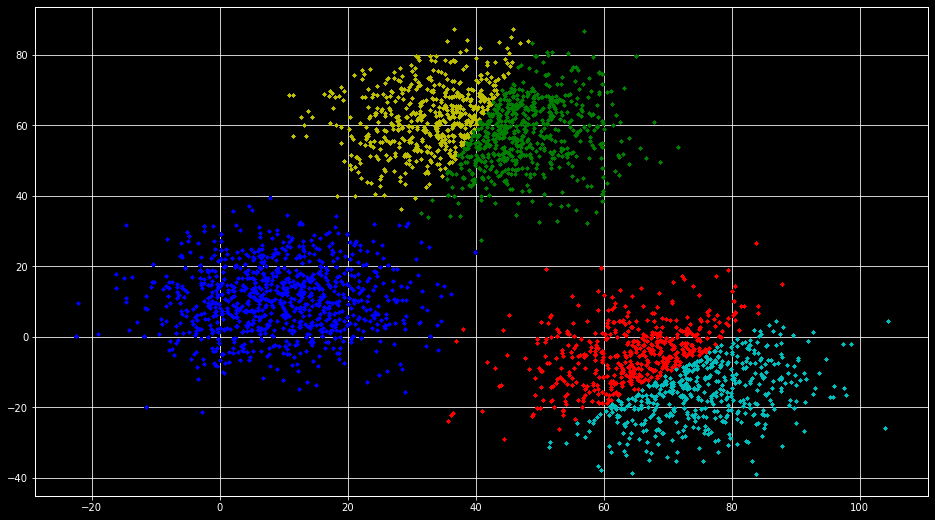

In [65]:
with plt.style.context('dark_background'):
    colors = ['r', 'g', 'b', 'y', 'c', 'm','w']
    fig, ax = plt.subplots()
    c = np.array([4,4])
    for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

array([[<AxesSubplot:title={'center':'col1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'col2'}, xlabel='[group]'>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

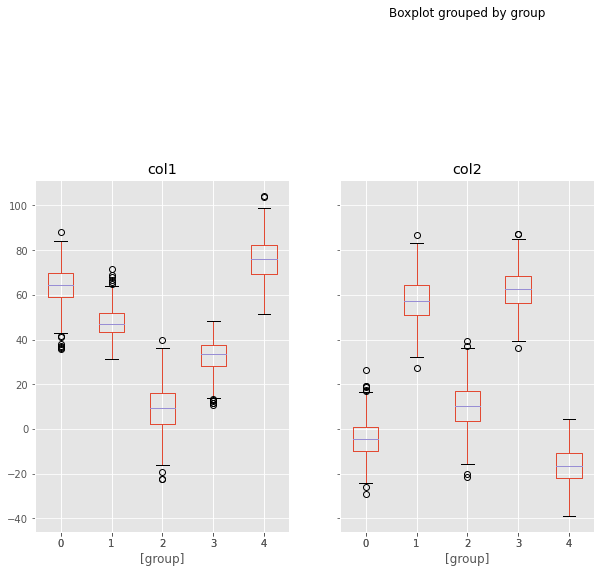

In [63]:
import matplotlib.pylab as plt
X_df.boxplot(by = 'group' , layout=(4,3) , figsize=(15,30))